# AirBnb Berlin

Airbnb data for Berlin - Germany.

## Kickoff Questions
1. How do space aspacts influence final review scoring and price ? 
2. How do amenities impact in the final review score of each listing ?  
3. How did prices evolve over time?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# listings of April 2020
df_listings = pd.read_csv('datasets/listings_2020-04-17.csv', low_memory=False)

## How do space aspacts influence final review scoring and price ? 

In [3]:
df_listings['float_price'] = df_listings['price'].str.replace('[$\,]','').astype('float64')
df = df_listings.dropna(axis=1, how='all')
df = df[df['float_price'] != 0.0]

Below is the correlation between aspects of accomadation with overall review score and price.

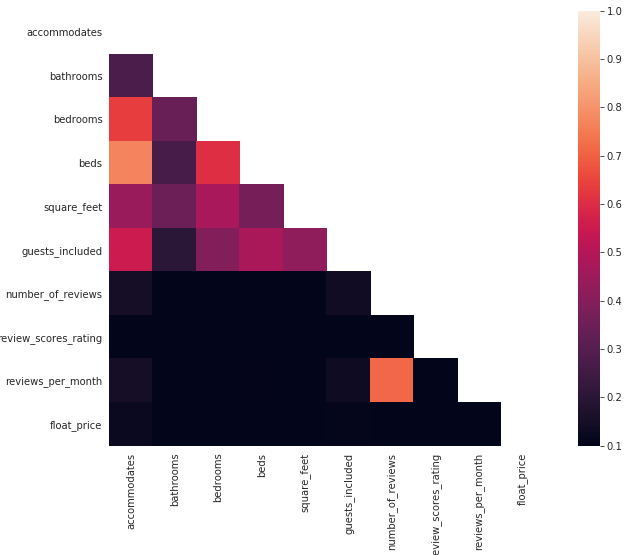

In [4]:
df = df[
    ['accommodates', 'bathrooms',
     'bedrooms', 'beds',
     'square_feet', 'guests_included',
     'number_of_reviews', 'review_scores_rating',
     'reviews_per_month', 'float_price']
]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corr, mask=mask, vmin=.1, square=True)
    ax.get_figure().savefig('features_correlation.png')

When we look at `float price` and `review_scores_rating` we see that those have very low correlation with everything else. We conclude that price and review score are not heavily influenced by space aspects.

## How do amenities impact in the final review score of each listing ?

Following are the questions I will explore in this section
1. How do prices vary per neigborhood ?
2. What neighborhood has the most expensive listings ?
3. What does differ a expensive listing to a cheap listing in terms of amenities? What are the most popular amenities?


Shown below are the top 10 **most** and **less** expensive neighbourhoods by listing price in average.

In [5]:
df_grouped = df_listings.groupby('neighbourhood')['float_price']

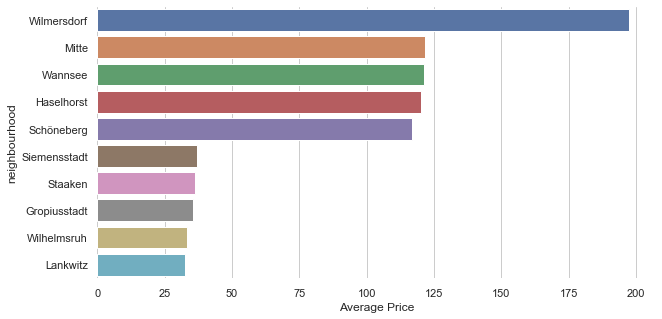

In [6]:
# sort neighbourhoods by price
df_mean = df_grouped.mean().sort_values(ascending=False)
df_mean = df_mean.reset_index()
df_mean = pd.concat([df_mean[:5], df_mean[-5:]])

df_mean.rename(columns={'float_price': 'Average Price'}, inplace=True)
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
res = sns.barplot(x='Average Price', y='neighbourhood', data=df_mean)
sns.despine(left=True, bottom=True)

res.get_figure().savefig('top_10_neigh.png')

Shown below are the amenities present in more than 50% of listings in the 10 more expensive neighbourhoods

In [7]:
# select popular amenities among listings in the most expensive neighbourhoods
indexer = [item in list(df_mean[:10]['neighbourhood']) for item in df_listings['neighbourhood']]
df_expensive_neig = df_listings[indexer]
number_of_listings = df_expensive_neig.shape[0]

df_amenities = df_expensive_neig['amenities']
df_amenities = pd.DataFrame([elem.replace('{','').replace('}', '').replace('"','').split(',') for elem in df_amenities])
df_amenities = pd.DataFrame(df_amenities.values.flatten())
df_amenities = df_amenities.dropna()

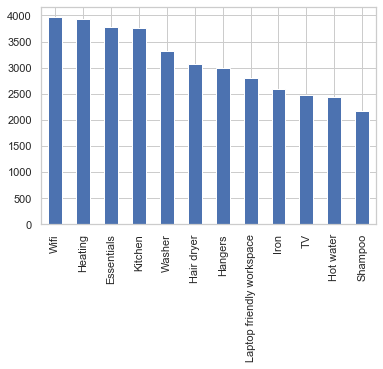

In [8]:
amenitites_counts = df_amenities[0].value_counts()
top_amenities = amenitites_counts[[count/number_of_listings > .5 for count in amenitites_counts]]
ax = top_amenities.plot.bar()
ax.get_figure().savefig('top10_amenities.png')

Shown below are the amenities present in more than 50% of listings in the 10 less expensive neighbourhoods

In [9]:
# select popular amenities among listings in the less expensive neighbourhoods
indexer = [item in list(df_mean[-10:]['neighbourhood']) for item in df_listings['neighbourhood']]
df_cheap_neig = df_listings[indexer]
number_of_listings = df_cheap_neig.shape[0]

df_amenities = df_cheap_neig['amenities']
df_amenities = pd.DataFrame([elem.replace('{','').replace('}', '').replace('"','').split(',') for elem in df_amenities])
df_amenities = pd.DataFrame(df_amenities.values.flatten())
df_amenities = df_amenities.dropna()

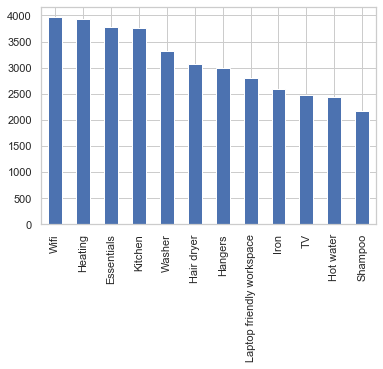

In [10]:
amenitites_counts = df_amenities[0].value_counts()
top_amenities = amenitites_counts[[count/number_of_listings > .5 for count in amenitites_counts]]
ax = top_amenities.plot.bar()
ax.get_figure().savefig('low10_amenities.png')

Amenities do not have huge impact on price. Nevertheless, there is a set of essential things you **MUST** have in your accomdation.

## How did prices evolve over time?  

**Note:** Data from previous months/year is required

In [11]:
dates = [
    # 2020
    ['2020-04-17'], ['2020-03-17'], ['2020-02-18'],
    ['2020-01-10'],
    # 2019
    ['2019-12-11'], ['2019-11-12'], ['2019-10-16'], 
    ['2019-09-19'], ['2019-08-12'], ['2019-07-11'],
    ['2019-06-08'], ['2019-05-14'], ['2019-04-11'], 
    ['2019-03-08'], ['2019-02-06'], ['2019-01-14'], 
    # 2018
    ['2018-12-10'], ['2018-11-07'], ['2018-10-10'], 
    ['2018-09-12'], ['2018-08-14'], ['2018-07-10'],
    ['2018-06-09'], ['2018-05-14'], ['2018-04-12'], 
    # 2017
    ['2017-05-08'], ['2017-04-08'], ['2017-03-06'], 
    ['2017-02-10'], ['2017-01-06'],
    # 2016
    ['2016-12-08'], ['2016-11-07'], ['2016-10-04'], 
    ['2016-09-05'], ['2016-08-04'], ['2016-07-05'],
    ['2016-06-03'], ['2016-05-03'], ['2016-04-04'], 
    ['2016-02-04'], ['2016-01-04'], 
    # 2015
    ['2015-12-05'], ['2015-11-08'], ['2015-10-03']
]

def get_mean(date):
    df = pd.read_csv(f"datasets/listings_{date}.csv", low_memory=False)
    df['float_price'] = df['price'].str.replace('[$\,]','').astype('float64')
    return df['float_price'].mean()

def get_month(month_of_year):
    months = {
        '01': 'Jan', '02': 'Feb', '03': 'Mar',
        '04': 'Apr', '05': 'May', '06': 'Jun',
        '07': 'Jul', '08': 'Aug', '09': 'Sep',
        '1': 'Jan', '2': 'Feb', '3': 'Mar',
        '4': 'Apr', '5': 'May', '6': 'Jun',
        '7': 'Jul', '8': 'Aug', '9': 'Sep',
        '10': 'Oct', '11': 'Nov', '12': 'Dec',
    }
    return months[month_of_year]

def labelize(date):
    date = pd.to_datetime(date)
    label = date.strftime('%Y %m')
    label = label[2::]
    return label[:-2] + get_month(label[-2:])

df = pd.DataFrame([[labelize(date[0]), get_mean(date[0])] for date in reversed(dates)], columns=['date','mean'])

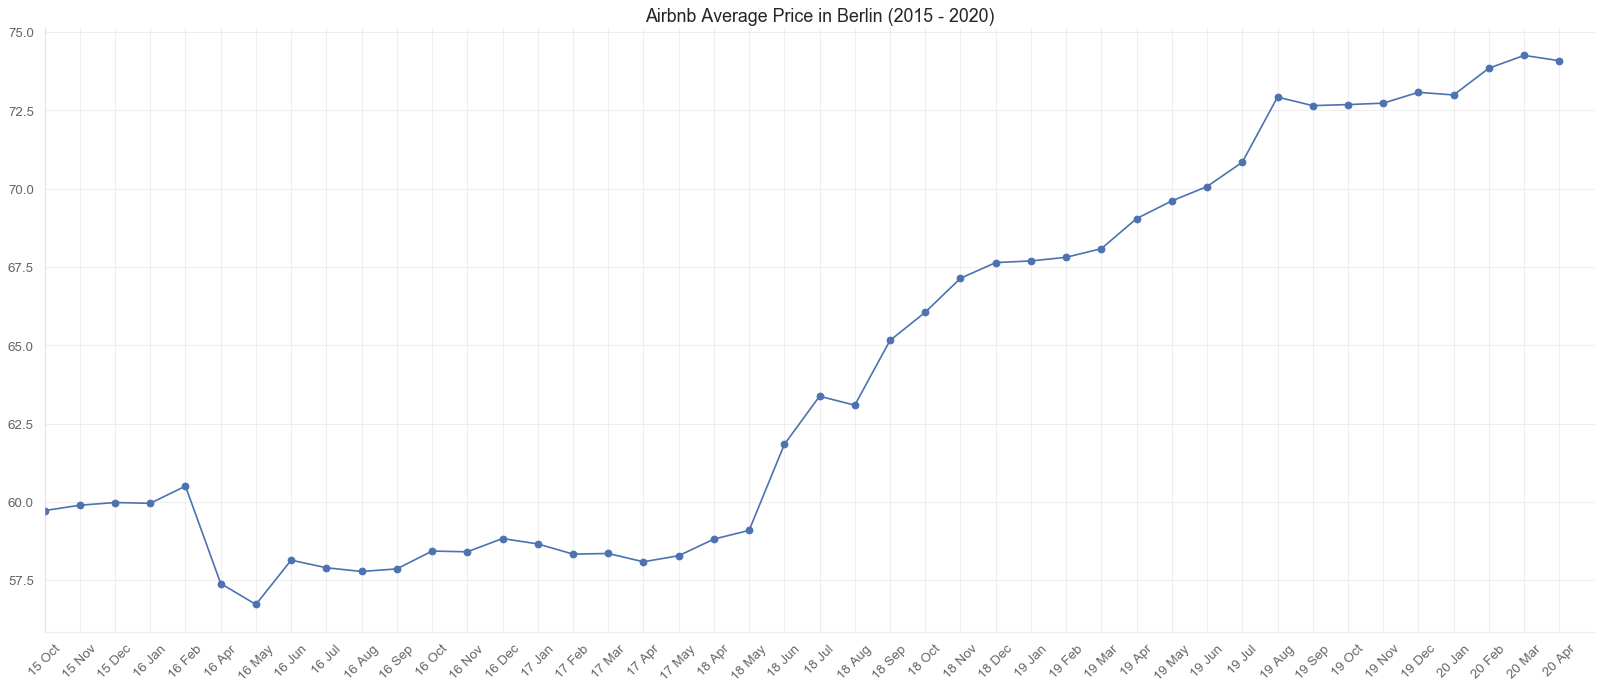

In [12]:
# draw plot
plt.figure(figsize=(25,10), dpi= 80)
plt.plot('date', 'mean', 'bo-', data=df)

# decoration
plt.xticks(ticks=range(0,df.shape[0]),labels=df['date'], rotation=45, fontsize=12, alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Airbnb Average Price in Berlin (2015 - 2020)", fontsize=16)
plt.grid(axis='both', alpha=.3)

# remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.xlim([0,df.shape[0]])
plt.show()
# plt.savefig('average_price_2015_2020.png')

In [13]:
(1 - df['mean'][0] / df['mean'][df.shape[0]-1])*100 # average price increase


19.389211074099677

In [14]:
(1- 122.033/174.85)*100 # housing index

30.207034601086647

In [15]:
 (1 - 0.3/0.8)*100 # inflation rate

62.5

Airbnb prices in Berlin increases 19%, while the housing index has increased 30% in the same period. Renting index has increased 33% for existings buildings and 45.20% for new buildings in the last five years. It shows that Airbnb prices increases slowly compared to housing/renting indexes.

Sources: 
* https://tradingeconomics.com/germany/housing-index
* https://guthmann.estate/en/market-report/berlin/#rent

In [16]:
# months of 2019
dates_19 = [
    ['2019-12-11'], ['2019-11-12'], ['2019-10-16'], ['2019-09-19'], ['2019-08-12'], ['2019-07-11'],
    ['2019-06-08'], ['2019-05-14'], ['2019-04-11'], ['2019-03-08'], ['2019-02-06'], ['2019-01-14']
]

# months of 2016, with missing march
dates_16 =[
    ['2016-12-08'], ['2016-11-07'], ['2016-10-04'], ['2016-09-05'], ['2016-08-04'], ['2016-07-05'],
    ['2016-06-03'], ['2016-05-03'], ['2016-04-04'],                 ['2016-02-04'], ['2016-01-04']
]

def labelize(date):
    date = pd.to_datetime(date)
    label = date.strftime('%Y %m')
    label = label[2::]
    return get_month(label[-2:])

df_16 = pd.DataFrame([[labelize(date[0]), get_mean(date[0])] for date in reversed(dates_16)], columns=['month','mean'])
df_19 = pd.DataFrame([[labelize(date[0]), get_mean(date[0])] for date in reversed(dates_19)], columns=['month','mean'])

In [17]:
# input mean for march 2016
line = pd.DataFrame({'month': 'Mar', 'mean': df_16['mean'][1]}, index=[2])
df_16 = pd.concat([df_16.iloc[:2], line, df_16.iloc[2:]]).reset_index(drop=True)

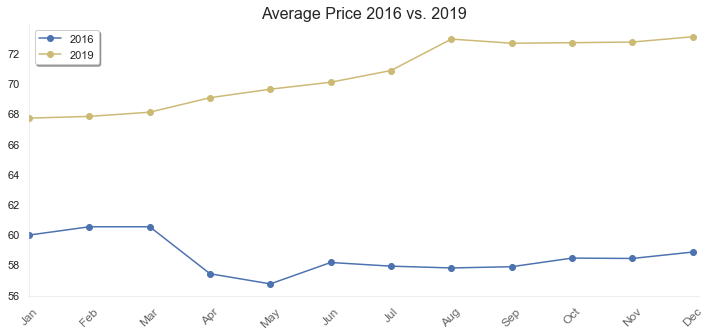

In [18]:
line_style = {1: 'bo-', 2: 'yo-'} 
fig, graph = plt.subplots()

graph.plot('month', 'mean', line_style[1], data=df_16, label = '2016')
graph.plot('month', 'mean', line_style[2], data=df_19, label = '2019')
plt.xticks(ticks=range(0, df_16.shape[0]),labels=df_16['month'], rotation=45, fontsize=12, alpha=.7)

fig.set_size_inches(12, 5)
graph.legend(shadow = True)
graph.grid()
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.title("Average Price 2016 vs. 2019", fontsize=16)
plt.xlim([0,11.1])
plt.show()
# plt.savefig('average_price_2016_vs_2019.png')

In [19]:
popular_types = df_listings['property_type'].value_counts()[:6] # popular property types
popular_types

Apartment             21874
Condominium             621
Loft                    497
House                   479
Serviced apartment      334
Hostel                  223
Name: property_type, dtype: int64

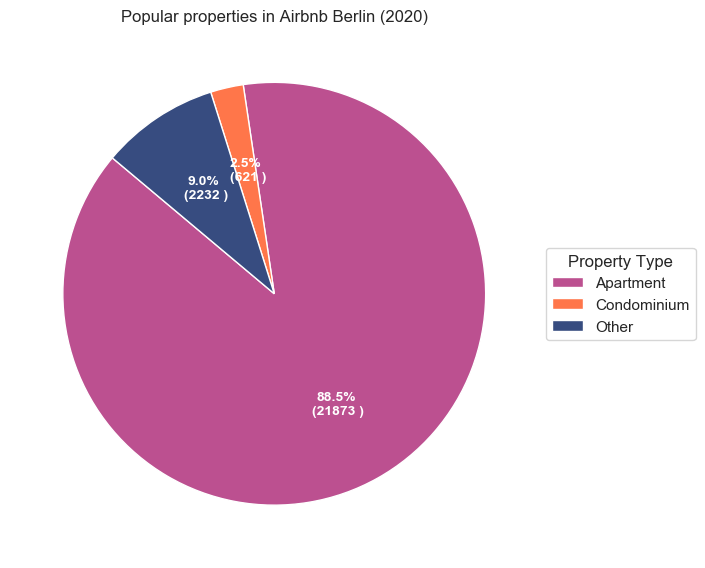

In [20]:
df = df_listings.copy(deep=True)
df['property_type'] = df['property_type'].apply(lambda t: t if (t=='Apartment' or t=='Condominium') else 'Other' )

df = df.groupby('property_type').size().reset_index(name='counts')

# draw plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 100)

data = df['counts']
categories = df['property_type']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  colors=['#bc5090','#ff764a','#374c80'],
                                  textprops=dict(color="w"),
                                  startangle=140)

# decoration
ax.legend(wedges, categories, title="Property Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Popular properties in Airbnb Berlin (2020)")
plt.show()
# plt.savefig('pizza_popular_property_types.png')

In [21]:
popular_neigh = df_listings['neighbourhood'].value_counts()[:5] # popular neighbourhoods
popular_neigh

Neukölln           3539
Prenzlauer Berg    3132
Friedrichshain     2877
Kreuzberg          2868
Mitte              2355
Name: neighbourhood, dtype: int64

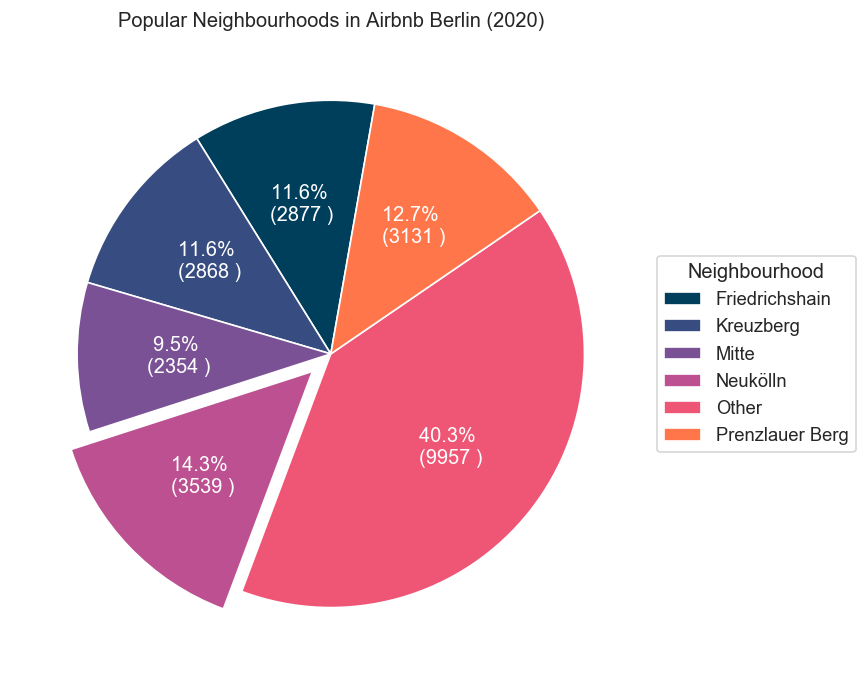

In [22]:
df = df_listings.copy(deep=True)
df['neighbourhood'] = df['neighbourhood'].apply(lambda t: t if (t in popular_neigh) else 'Other' )

df = df.groupby('neighbourhood').size().reset_index(name='counts')

# draw plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 120)

data = df['counts']
categories = df['neighbourhood']
explode = explode = (0, 0, 0, 0.1,0,0)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% \n({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  explode=explode,
                                  labels = df['neighbourhood'],
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors = ['#003f5c','#374c80','#7a5195','#bc5090','#ef5675','#ff764a','#ffa600'],
                                 startangle=80)

# Decoration
ax.legend(wedges, categories, title="Neighbourhood", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
# plt.setp(autotexts, size=10, weight=700)
ax.set_title("Popular Neighbourhoods in Airbnb Berlin (2020)")
plt.show()
# plt.savefig('pizza_popular_neigh.png')

In [23]:
calendar_usecols_list = ['listing_id', 'date', 'available', 'price']
df_calendar20 = pd.read_csv('datasets/calendar_2020-04-17.csv', usecols = calendar_usecols_list)
df_calendar20['price'] = df_calendar20['price'].str.replace('[$\,]','').astype('float64')
df_calendar20.head()

,listing_id,date,available,price
0,204617,2020-04-21,f,50.0
1,116832,2020-04-18,f,70.0
2,116832,2020-04-19,f,70.0
3,116832,2020-04-20,f,70.0
4,116832,2020-04-21,f,70.0


In [24]:
df_calendar20['date'] = pd.to_datetime(df_calendar20['date'])
df_calendar20['month'] = df_calendar20['date'].dt.month
df_calendar20.head()

,listing_id,date,available,price,month
0,204617,2020-04-21,f,50.0,4
1,116832,2020-04-18,f,70.0,4
2,116832,2020-04-19,f,70.0,4
3,116832,2020-04-20,f,70.0,4
4,116832,2020-04-21,f,70.0,4


In [25]:
listings_usecols_list = ['id', 'property_type', 'accommodates']
df_listings20 = pd.read_csv('datasets/listings_2020-04-17.csv', usecols = listings_usecols_list)
df_listings20.rename(columns = {'id' : 'listing_id'}, inplace = True)

df = pd.merge(df_calendar20, df_listings20, on = 'listing_id', how = 'left')
df['price_per_person'] = df['price'] / df['accommodates']
df.head()

,listing_id,date,available,price,month,property_type,accommodates,price_per_person
0,204617,2020-04-21,f,50.0,4,Apartment,2,25.000000
1,116832,2020-04-18,f,70.0,4,Apartment,3,23.333333
2,116832,2020-04-19,f,70.0,4,Apartment,3,23.333333
3,116832,2020-04-20,f,70.0,4,Apartment,3,23.333333
4,116832,2020-04-21,f,70.0,4,Apartment,3,23.333333


In [26]:
means = df.groupby(['property_type', 'month'])['price'].mean().unstack(0)
means.head()

property_type,Aparthotel,Apartment,Barn,Bed and breakfast,Boat,Boutique hotel,Bungalow,Cabin,Camper/RV,Castle,...,Lighthouse,Loft,Other,Pension (South Korea),Serviced apartment,Tiny house,Tipi,Townhouse,Treehouse,Villa
month,,,,,,,,,,,,,,,,,,,,,
1,152.731924,78.175230,41.587097,61.270818,235.014663,209.473809,73.130184,69.336406,47.094086,87.5,...,65.000000,128.140391,66.947818,81.754032,155.116960,68.426799,32.000000,79.886061,83.000000,135.575269
2,218.323892,76.376501,41.607143,61.179402,235.012987,269.245740,72.727041,67.551020,46.869048,87.5,...,65.000000,127.731101,67.126050,78.750000,153.157720,68.395604,32.000000,79.740826,83.000000,135.537698
3,222.008899,75.521974,41.780645,61.395349,235.011730,267.806452,72.986175,67.511521,47.975806,87.5,...,65.000000,127.911534,67.188805,78.750000,141.277767,68.521092,32.000000,79.831311,83.000000,135.930108
4,189.942792,75.762308,41.840000,59.857805,236.241692,212.004275,72.272189,66.619048,47.283747,87.5,...,65.333333,124.659153,70.828794,79.145833,167.422116,68.966752,27.600000,79.050213,83.032967,134.758303
5,152.232481,76.724130,41.741935,60.156789,233.319648,138.264871,72.402074,68.645161,45.604839,87.5,...,65.000000,123.680859,69.695446,93.870968,202.559880,71.689826,20.032258,77.967446,84.903226,134.872760


In [27]:
means = means[popular_types.index.tolist()]
means.head()

property_type,Apartment,Condominium,Loft,House,Serviced apartment,Hostel
month,,,,,,
1,78.175230,72.275570,128.140391,76.868207,155.116960,78.052365
2,76.376501,71.881643,127.731101,76.749404,153.157720,77.952274
3,75.521974,71.921459,127.911534,76.657149,141.277767,82.864892
4,75.762308,70.878059,124.659153,76.124074,167.422116,127.015311
5,76.724130,70.317334,123.680859,74.556132,202.559880,77.256184


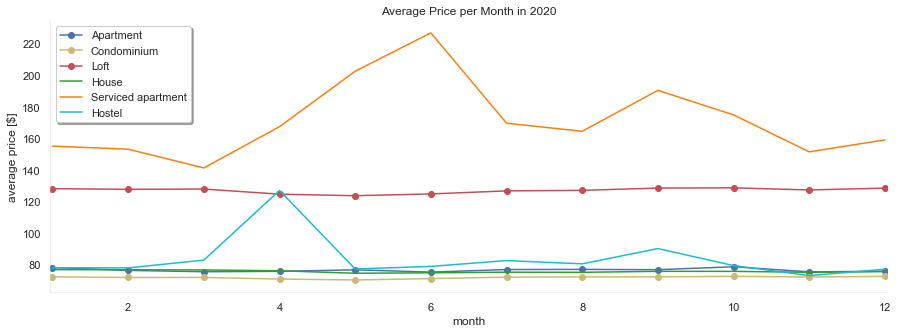

In [28]:
#Creating variable that will support the plotting
fmt_lines_dictionary = {1: 'bo-', 2: 'yo-', 3: 'ro-', 4: 'tab:green', 5: 'tab:orange', 6: 'tab:cyan'} 
fig, graph = plt.subplots()
count = 1

#Input of data
for t in means.columns:
    data = means[t]
    x    = data.index
    y    = list(data)
    graph.plot(x, y, fmt_lines_dictionary[count], label = t)
    count += 1

#Setting of charts
fig.set_size_inches(15, 5)
graph.legend(shadow = True)
graph.set(xlabel = 'month', ylabel = 'average price [$]', xlim=[.97,12.03], title = 'Average Price per Month in 2020')
graph.grid()
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.show()

In [29]:
df = pd.read_csv('datasets/reviews_2020-04-17.csv', low_memory=False)
df.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments
527078,43067472,621818510,2020-04-05,11736601,Najda,Samra is a great host. She is very caring pers...
527079,43070379,621646024,2020-04-03,56391149,Christian,Wszystko w najlepszym porządku...:))\nSzczegól...
527080,43078465,621816757,2020-04-05,342933470,Graziela,Muito bom
527081,43085548,622509889,2020-04-16,28045664,Sarp,"Good location, the place is clean, I'd recomme..."
527082,43108263,622202935,2020-04-11,343502876,Артур,Адреса не вврна


In [30]:
df['parsed_date'] = pd.to_datetime(df['date'])
df = df[df['parsed_date'] > pd.to_datetime('2016-01-01')]
df['year'] = df['parsed_date'].dt.year
df['month'] = df['parsed_date'].dt.month
counts = df.groupby(['year','month'])['listing_id'].count().unstack(0)

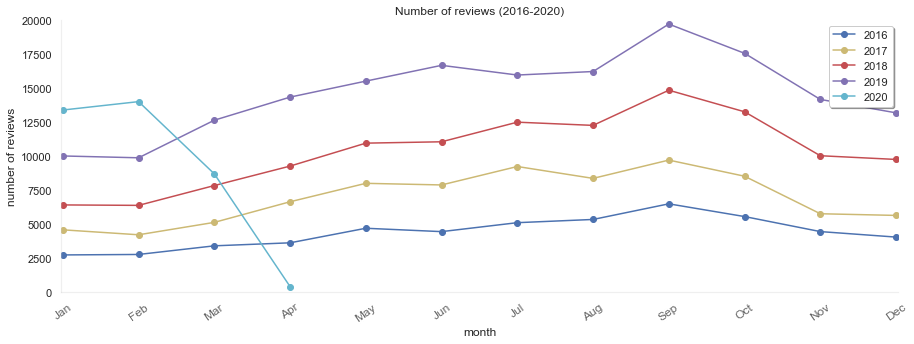

<Figure size 432x288 with 0 Axes>

In [31]:
line_style = {1: 'bo-', 2: 'yo-', 3: 'ro-', 4: 'mo-', 5: 'co-'} 
fig, graph = plt.subplots()
count = 1

for year in counts.columns:
    data = counts[year]
    x    = data.index
    y    = list(data)
    graph.plot(x, y, line_style[count], label = year)
    count += 1

labels = [get_month(str(i)) for i in range(1,13)]
plt.xticks(ticks=range(1, counts.shape[0]+1),labels=labels, rotation=35, fontsize=12, alpha=.7)


fig.set_size_inches(15, 5)
graph.legend(shadow = True)
graph.set(xlabel = 'month', ylabel = 'number of reviews', xlim=[.98,12.03], ylim=[0,20_000], title = 'Number of reviews (2016-2020)')
graph.grid()
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 

plt.show()
plt.savefig('reviews_2016_2020.png')

We can see that every year prices vary in same way throughout the year, every year. However, we can see that 2020 had a drastic impact because of COVID-19

In [32]:
df['year_month'] = df['parsed_date'].dt.strftime('%Y %m')
counts = df.groupby(['year_month'])['listing_id'].count()
counts = counts.to_frame().reset_index().rename(columns={'listing_id' : 'count'})

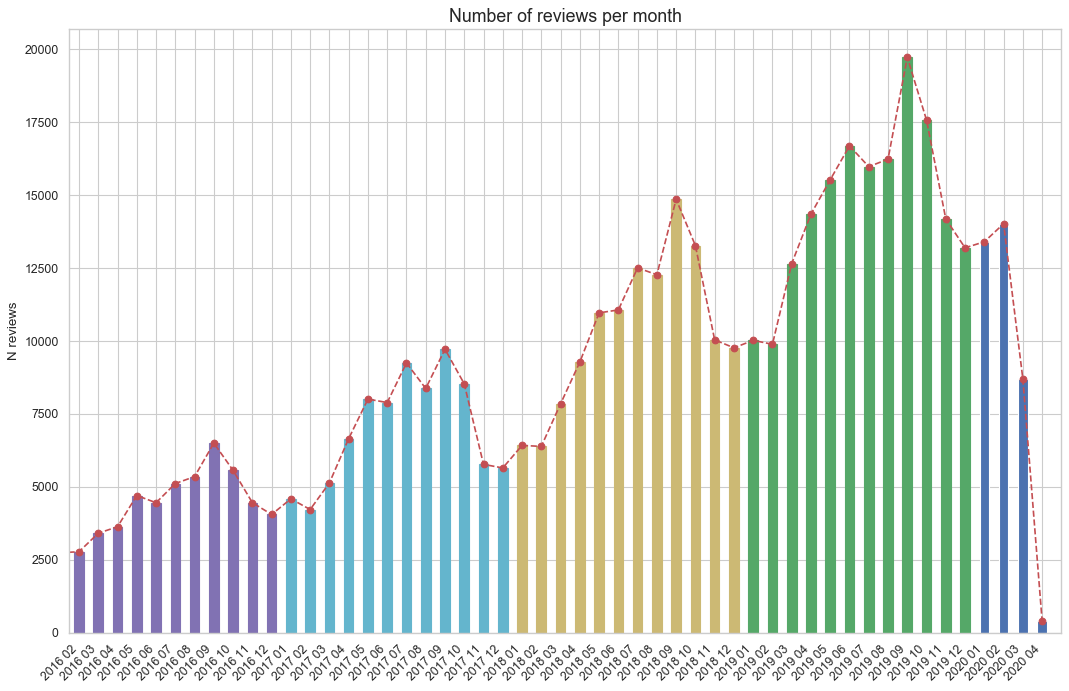

In [33]:
df=counts

plt.figure(figsize=(16,10), dpi= 80)
bars = plt.bar(df['year_month'], df['count'], width=.5)
for i in range(12):
    bars[i].set_color('m')
for i in range(12,24):
    bars[i].set_color('c')
for i in range(24,36):
    bars[i].set_color('y')
for i in range(36, 48):
    bars[i].set_color('g')

plt.gca().set_xticklabels(df['year_month'], rotation=45, horizontalalignment= 'right')
plt.title("Number of reviews per month", fontsize=16)
plt.ylabel('N reviews')
plt.plot(df['year_month'], df['count'], 'ro--')
plt.xlim([0.5, df['year_month'].shape[0]])
plt.show()
# plt.savefig('activity_per_month_since_2016.png')

We can observe spikes during the summer, in July, August, September every year. We can also observe a steady increasing in number of reviews per each year, that reveals that increase in Airbnb adoption in Berlin.